In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, ParameterGrid
import random
random.seed(1)

# Import data

In [2]:
df = pd.read_parquet("dataset.parquet")
Y = df[['Municipal', 'Year', 'Country']]
X = df[[x for x in df.columns if x not in ['COU', 'Municipal', 'Household', 'Recovered', 'Recicled', 'Compost', 'Disposal']]]
# X_train = X[X.Year < Year_to_separate].copy()
# X_test = X[X.Year >= Year_to_separate].copy()
# Y_train = Y[X.Year < Year_to_separate].copy()
# Y_test = Y[X.Year >= Year_to_separate].copy()
#X_train = pd.read_parquet("Xtime/X_train.parquet")
#X_test = pd.read_parquet("Xtime/X_test.parquet")
#Y_train = pd.read_parquet("Ytime/Y_train.parquet")
#Y_test = pd.read_parquet("Ytime/Y_test.parquet")

# Make empty dataframe

In [3]:
results = pd.DataFrame(columns = range(df.Year.min()+1, df.Year.max()+1), index = df.Country.unique())

In [4]:
results

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Czech Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Denmark,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Finland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Greece,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Functions

In [5]:
par = ParameterGrid({'kernel':['rbf'],
              'C':[0.5, 1, 5, 10, 50, 100, 500, 1000],
              'epsilon':[0.1,0.01,0.001]})
ln = len(par)
def GridSearch(rf, X_train, X_test, y_train, y_test, scalerX, scalerY, verbose=False):
    best_score = 0
    i = 0
    for g in par:
        if(verbose):
            print(f"Probando: {g}, {i} de {ln}")
        i+=1
        rf.set_params(**g)
        startTime = time.time()
        rf.fit(X_train, np.ravel(y_train))
        elapsedTime = time.time() - startTime
        score = rf.score(X_test, y_test)
#         score = np.abs(((   scalerY.inverse_transform([rf.predict(X_test)]) -  # Predicciones
#                                       scalerY.inverse_transform([Y_test[0]]) # Reales
#                                   ) / scalerY.inverse_transform([Y_test[0]]) # Porcentaje respecto al real
#                                  )).sum()/len(Y_test)*100
        if(verbose):
            print(f"Tiempo de entrenamiento: {elapsedTime} s, score: {score}")
        # save if best
        if score > best_score:
            best_score = score
            best_grid = g
    print(f"Best Score: {best_score}")
    print(f"Best Parameters: {best_grid}")
    return best_grid

In [6]:
def get_data(y):
    X_train = X[X.Year < y].copy()
    X_test = X[X.Year >= y].copy()
    Y_train = Y[X.Year < y].copy()
    Y_test = Y[X.Year >= y].copy()
    X_train.drop(columns=['Year', 'Country'], inplace=True)
    X_test.drop(columns=['Year', 'Country'], inplace=True)
    Y_train.drop(columns=['Year', 'Country'], inplace=True)
    Y_test.drop(columns=['Year', 'Country'], inplace=True)
    scalerX = MinMaxScaler().fit(X_train)
    X_train = pd.DataFrame(scalerX.transform(X_train))
    X_test = pd.DataFrame(scalerX.transform(X_test))
    scalerY = MinMaxScaler().fit(Y_train)
    Y_train = pd.DataFrame(scalerY.transform(Y_train))
    Y_test = pd.DataFrame(scalerY.transform(Y_test))
    return X_train, X_test, Y_train, Y_test, scalerX, scalerY

In [7]:
def get_data_country(y, country, scalerX, scalerY):
    X_1 = X[X.Country == country].copy()
    Y_1 = Y[Y.Country == country].copy()
#     X_test = X_1
#     Y_test = Y_1
    X_test = X_1[X_1.Year >= y].copy()
    Y_test = Y_1[Y_1.Year >= y].copy()
    X_test.drop(columns=['Year', 'Country'], inplace=True)
    Y_test.drop(columns=['Year', 'Country'], inplace=True)
    X_test = pd.DataFrame(scalerX.transform(X_test))
    Y_test = pd.DataFrame(scalerY.transform(Y_test))
    return X_test, Y_test

El algoritmo es:
Para cada año:
   - Sacar variables
   - Entrenar modelo
   - Para cada país:
       * Sacar variables
       * Score, almacenar en results

In [8]:
for y in results.columns:
    X_train, X_test, Y_train, Y_test, scalerX, scalerY = get_data(y)
    g = GridSearch(svm.SVR(), X_train, X_test, Y_train, Y_test, scalerX, scalerY)
    model = svm.SVR(**g).fit(X_train, np.ravel(Y_train))
    for country in results.index:
        X_test, Y_test = get_data_country(y, country, scalerX, scalerY)
        results.at[country, y] = (((   scalerY.inverse_transform([model.predict(X_test)]) -  # Predicciones
                                      scalerY.inverse_transform([Y_test[0]]) # Reales
                                  ) / scalerY.inverse_transform([Y_test[0]]) # Porcentaje respecto al real
                                 )).sum()/len(Y_test)*100 # Media errores porcentaje
#         results.at[country, y] = model.score(X_test, Y_test)

Best Score: 0.7030767933865787
Best Parameters: {'C': 5, 'epsilon': 0.001, 'kernel': 'rbf'}
Best Score: 0.7725940249928928
Best Parameters: {'C': 500, 'epsilon': 0.001, 'kernel': 'rbf'}
Best Score: 0.6921717332113423
Best Parameters: {'C': 1, 'epsilon': 0.001, 'kernel': 'rbf'}
Best Score: 0.6650192580592329
Best Parameters: {'C': 0.5, 'epsilon': 0.001, 'kernel': 'rbf'}
Best Score: 0.6572196116908617
Best Parameters: {'C': 0.5, 'epsilon': 0.001, 'kernel': 'rbf'}
Best Score: 0.653046254229231
Best Parameters: {'C': 0.5, 'epsilon': 0.001, 'kernel': 'rbf'}
Best Score: 0.6263018724735054
Best Parameters: {'C': 10, 'epsilon': 0.001, 'kernel': 'rbf'}
Best Score: 0.6903774073147266
Best Parameters: {'C': 5, 'epsilon': 0.001, 'kernel': 'rbf'}
Best Score: 0.6679234058390053
Best Parameters: {'C': 5, 'epsilon': 0.01, 'kernel': 'rbf'}
Best Score: 0.651029589319906
Best Parameters: {'C': 1, 'epsilon': 0.01, 'kernel': 'rbf'}
Best Score: 0.6951510491676411
Best Parameters: {'C': 10, 'epsilon': 0.001,

In [9]:
results

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Australia,154.472,81.5711,96.9611,71.7069,82.7072,96.7451,54.5418,62.1938,109.569,137.165,...,-34.2887,24.5084,24.5718,26.6882,28.1013,24.7564,15.8137,1.70854,-1.72856,-2.05478
Austria,118.748,-8.94232,132.063,141.122,120.206,126.277,30.3905,78.2809,243.898,193.257,...,52.8163,-10.1871,-0.857886,0.611324,-4.87367,-9.29036,-3.17712,-13.6445,-14.8166,-1.95279
Belgium,414.344,109.949,35.1399,-20.5978,-29.1938,25.5844,170.099,59.8784,93.5579,-59.8236,...,68.224,32.3455,51.2819,45.1157,34.9981,119.103,122.294,-17.9759,-24.852,-11.4281
Canada,1368.17,760.699,996.755,862.372,971.581,1094.62,836.286,877.383,1015.81,1267,...,186.965,196.611,213.318,216.015,194.579,159.195,131.469,108.622,36.7636,11.1695
Czech Republic,44.5248,4.46656,113.068,209.24,214.611,97.2255,172.224,100.004,63.6558,-16.602,...,159.888,39.3747,33.5567,22.6542,28.5553,24.7458,26.312,17.9919,23.9434,24.9627
Denmark,160.128,-86.8072,-74.3443,-56.9355,-60.1613,-85.4705,-161.502,-115.458,-137.716,-73.8784,...,-15.6711,13.3462,16.4458,5.85627,-47.0384,27.0153,-7.53406,-7.5879,-9.66875,-8.08101
Finland,189.296,-107.463,348.584,430.085,393.225,357.053,9.48363,52.5223,343.546,337.967,...,94.3733,13.8271,66.8008,99.6732,36.5268,124.968,73.5592,43.6069,24.8343,28.0443
France,-19.4271,-23.2557,-16.0483,-14.6359,-4.82972,6.6444,42.5822,44.0522,51.1986,46.269,...,54.1738,59.0818,62.7379,25.2481,28.6271,17.4473,18.4417,14.1763,4.1255,-3.08624
Germany,5.76294,2.71497,3.29274,-0.280059,0.218244,0.633019,-1.40269,-4.86574,-6.39373,-7.613,...,-6.06907,-3.7293,-1.39516,1.5389,8.748,5.22249,4.07243,-3.03232,-4.6658,-1.04397
Greece,124.366,84.1496,28.531,10.424,28.5921,28.8286,-35.7181,-35.4865,33.8763,3.85502,...,-48.9784,-44.1996,-33.1488,-18.4869,7.39845,-22.026,9.16594,1.55179,-2.67206,-0.161945


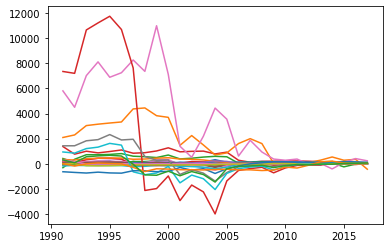

In [10]:
for c in results.index:
    a = results.loc[c]
    plt.plot(a)

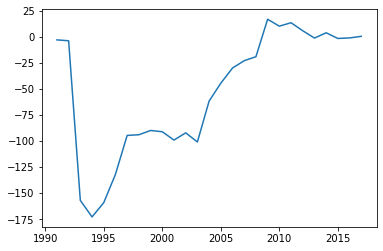

In [11]:
plt.plot(results.loc['Colombia'])

In [12]:
a = []
for c in results.index:
#     if c == 'Luxembourg':
#         continue
#     if c == 'Iceland':
#         continue
#     if c == 'Estonia':
#         continue
    a.append(results.loc[c][results.columns > 2006].mean())
    print(f'{c}: {a[len(a)-1]}%')
    
    
a.sort()
print(a)
    
mean = np.mean(a)
std = np.sqrt(np.sum([(b - mean)**2 for b in a])/(len(a)))
print(f'Media total: {np.mean(a)}')
print(f'Desviación típica: {np.std(a)}')
print(f'Desviación típica: {std}')
    

Australia: 6.482535296694232%
Austria: 6.951522438416765%
Belgium: 39.889518067328396%
Canada: 143.01799103945984%
Czech Republic: 48.74095834007408%
Denmark: -4.0169124306149095%
Finland: 64.22820340139975%
France: 30.247456041007105%
Germany: -0.701382850774094%
Greece: -17.974294565940685%
Hungary: -11.751509158945789%
Iceland: 427.2009461102205%
Ireland: 29.58512806927729%
Italy: 13.935655695227574%
Japan: -3.765342530239916%
Korea: -20.07567017976372%
Luxembourg: 375.2635517001508%
Mexico: -3.428311244091546%
Netherlands: 75.49007233748445%
New Zealand: -37.5374450896801%
Norway: 94.75134226428366%
Poland: -9.958378230420914%
Portugal: 44.71534625935037%
Slovak Republic: -38.45320866342865%
Spain: -0.3745394231804735%
Sweden: 18.519324342779594%
Switzerland: 9.06569486341737%
Turkey: -4.86715130369371%
United Kingdom: 7.2693946993457805%
United States: 1.1533074529426293%
Brazil: 9.546446744420093%
Chile: -14.447555535652482%
China (People's Republic of): 0.3380032484863408%
Eston

1991: 476.44965028898804%
1992: 396.8361640534964%
1993: 616.8305605960418%
1994: 672.0179827936728%
1995: 676.1284898315198%
1996: 648.028591084096%
1997: 528.580793393431%
1998: 216.57924469040546%
1999: 308.1934475480717%
2000: 258.0370377226998%
2001: -73.01400451516213%
2002: -19.657765576388126%
2003: -31.891290760789683%
2004: -105.21234903910899%
2005: 16.91202773728525%
2006: 12.79002163057304%
2007: 74.51040867444297%
2008: 57.5578845903497%
2009: -23.8258403971316%
2010: 2.0809984669566735%
2011: 14.068797908517425%
2012: 7.14909448913802%
2013: 29.95649082830388%
2014: 33.96083050974859%
2015: 15.69827307022817%
2016: 22.6045233034241%
2017: 4.528556813623612%


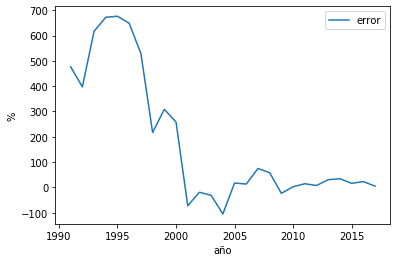

In [13]:
a = []
for c in results.columns:
    a.append(results[c].mean())
    print(f'{c}: {a[len(a)-1]}%')
plt.plot(results.columns,a, label="error")
plt.xlabel("año")
plt.ylabel("%")
plt.legend()